## 1. Introduction

In [1]:
# Importing libraries
import igraph
import pandas as pd
import numpy as np
from igraph.drawing import plot
import matplotlib.pyplot as plt
import random

In [2]:
# Importing edges data into Pandas Dataframe
df_edges = pd.read_csv('network/edges.csv', header = 0, names = ['source','target','distance','airline','airline_code','codeshare','equiment','stops'])

In [3]:
# Importing nodes data into Pandas Dataframe
df_nodes = pd.read_csv('network/nodes.csv', header = 0, names = ['index','id','name','city','country','IATA/FAA','ICAO','latitude','longitude','altitude','timezone','DST','_pos'])

In [4]:
df_edges

,source,target,distance,airline,airline_code,codeshare,equiment,stops
0,0,2,124.520121,CG,1308,0,DH8 DHT,0
1,0,3,157.150822,CG,1308,0,DH8,0
2,0,1,106.747399,CG,1308,0,DH8,0
3,0,4,424.726096,CG,1308,0,DH8,0
4,0,4,424.726096,PX,328,0,DH4 DH8 DH3,0
...,...,...,...,...,...,...,...,...
66766,3211,2767,1217.384762,KN,10741,0,737,0
66767,3211,2840,375.021414,MU,1758,1,737,0
66768,3211,2767,1217.384762,MU,1758,1,737,0
66769,3212,1675,425.533589,GS,690,0,E90,0


In [5]:
df_nodes

,index,id,name,city,country,IATA/FAA,ICAO,latitude,longitude,altitude,timezone,DST,_pos
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,"array([6.29268027, 1.37900375])"
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,"array([6.30735453, 1.39906658])"
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,"array([6.3014785 , 1.38535133])"
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,"array([6.27849235, 1.39511825])"
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,"array([6.23308524, 1.34013967])"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,3209,11290,Kongolo Airport,Kongolo,Congo (Kinshasa),KOO,FZRQ,-5.394440,26.990000,1850,1.0,U,"array([5.5164688 , 1.37876336])"
3210,3210,11436,Tarko-Sale Airport,Tarko-Sale,Russia,TQL,USDS,64.930801,77.818100,82,5.0,U,"array([5.87627232, 1.43157964])"
3211,3211,11473,Jinchuan Airport,Jinchuan,China,JIC,ZLJC,38.542222,102.348333,4740,8.0,U,"array([6.169881 , 1.28830756])"
3212,3212,11498,Alashankou Bole (Bortala) airport,Bole,China,BPL,ZWAX,44.895000,82.300000,1253,8.0,N,"array([6.07268073, 1.40575676])"


In [6]:
df_nodes[ (df_nodes['index'] == 132) ]

,index,id,name,city,country,IATA/FAA,ICAO,latitude,longitude,altitude,timezone,DST,_pos
132,132,209,Soummam Airport,Bejaja,Algeria,BJA,DAAE,36.712002,5.06992,20,1.0,N,"array([5.88979992, 1.13197623])"


In [30]:
# Creating the Airport Network from nodes Dataframe data
AN = igraph.Graph.TupleList(df_edges.itertuples(index=False), 
                            edge_attrs=['distance','airline','airline_code','codeshare','equiment','stops'])

In [39]:
AN.vs['node_id'] = AN.vs['name']

In [31]:
# Iterate through the DataFrame and assign attributes to graph vertices
for index, row in df_nodes.iterrows():
    node_id = row['index']  # Assuming 'node_id' is the column containing node identifiers
    attributes = {
        'airport_name': row['name'],  # Replace with your actual attribute column names
        'city': row['city'],  # Replace with your actual attribute column names
        'country': row['country'],
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'altitude': row['altitude']
        # Add more attributes as needed
    }
    
    # Access the vertex and set its attributes
    vertex = AN.vs.find(name = node_id)
    vertex.update_attributes(**attributes)


In [33]:
AN.vs['name']

[0,
 2,
 3,
 1,
 4,
 5,
 2250,
 2256,
 2251,
 2254,
 2253,
 2243,
 2246,
 2245,
 2255,
 1610,
 2244,
 2247,
 2241,
 2135,
 2242,
 1612,
 1951,
 2048,
 1485,
 2248,
 2249,
 1115,
 903,
 1058,
 1607,
 1639,
 2257,
 6,
 7,
 2260,
 2261,
 2264,
 8,
 1988,
 2266,
 2262,
 13,
 14,
 295,
 1989,
 9,
 2265,
 10,
 11,
 12,
 218,
 308,
 315,
 282,
 368,
 294,
 1699,
 184,
 628,
 1853,
 1721,
 191,
 270,
 1829,
 1870,
 253,
 255,
 242,
 196,
 1754,
 2115,
 31,
 125,
 758,
 245,
 640,
 271,
 247,
 566,
 188,
 15,
 73,
 80,
 87,
 16,
 2288,
 121,
 122,
 17,
 89,
 124,
 65,
 99,
 18,
 46,
 130,
 19,
 2289,
 2326,
 79,
 90,
 20,
 71,
 97,
 3044,
 21,
 113,
 22,
 26,
 118,
 126,
 44,
 23,
 24,
 25,
 48,
 43,
 27,
 34,
 49,
 28,
 84,
 29,
 30,
 115,
 111,
 59,
 3043,
 104,
 1800,
 1914,
 1715,
 1708,
 1744,
 1885,
 1712,
 56,
 60,
 72,
 74,
 98,
 102,
 1901,
 47,
 82,
 853,
 1888,
 841,
 45,
 55,
 110,
 119,
 32,
 120,
 33,
 96,
 2148,
 83,
 88,
 131,
 2146,
 2295,
 91,
 106,
 3120,
 2308,
 95,
 35,
 36

## 2. Network representation

In [34]:
# Apply a layout algorithm
layout = AN.layout_kamada_kawai()

# Customize node and edge attributes, e.g., colors, sizes
visual_style = {
    "vertex_size": 10,
    "vertex_color": "lightblue",
    "edge_color": "gray",
    "edge_width": 0.2,
    "bbox": (800, 800),
    "layout": layout,
    "margin": 20
}

# Plot the graph
#plot(AN, **visual_style)

## 3. Network classification

In [35]:
# Check if the Graph is directed or undirected
if AN.is_directed():
    print('The Airport Network is directed.')
else:
    print('The Airport Network is undirected.')

The Airport Network is undirected.


In [36]:
AN.is_weighted()

False

## 4. Network topological properties

### 4.1 Summary

In [37]:
# Print the number of nodes and edges
print(AN.summary())

IGRAPH UN-- 3214 66771 -- 
+ attr: airport_name (v), altitude (v), city (v), country (v), latitude (v), longitude (v), name (v), airline (e), airline_code (e), codeshare (e), distance (e), equiment (e), stops (e)


In [38]:
AN.vs['name']

[0,
 2,
 3,
 1,
 4,
 5,
 2250,
 2256,
 2251,
 2254,
 2253,
 2243,
 2246,
 2245,
 2255,
 1610,
 2244,
 2247,
 2241,
 2135,
 2242,
 1612,
 1951,
 2048,
 1485,
 2248,
 2249,
 1115,
 903,
 1058,
 1607,
 1639,
 2257,
 6,
 7,
 2260,
 2261,
 2264,
 8,
 1988,
 2266,
 2262,
 13,
 14,
 295,
 1989,
 9,
 2265,
 10,
 11,
 12,
 218,
 308,
 315,
 282,
 368,
 294,
 1699,
 184,
 628,
 1853,
 1721,
 191,
 270,
 1829,
 1870,
 253,
 255,
 242,
 196,
 1754,
 2115,
 31,
 125,
 758,
 245,
 640,
 271,
 247,
 566,
 188,
 15,
 73,
 80,
 87,
 16,
 2288,
 121,
 122,
 17,
 89,
 124,
 65,
 99,
 18,
 46,
 130,
 19,
 2289,
 2326,
 79,
 90,
 20,
 71,
 97,
 3044,
 21,
 113,
 22,
 26,
 118,
 126,
 44,
 23,
 24,
 25,
 48,
 43,
 27,
 34,
 49,
 28,
 84,
 29,
 30,
 115,
 111,
 59,
 3043,
 104,
 1800,
 1914,
 1715,
 1708,
 1744,
 1885,
 1712,
 56,
 60,
 72,
 74,
 98,
 102,
 1901,
 47,
 82,
 853,
 1888,
 841,
 45,
 55,
 110,
 119,
 32,
 120,
 33,
 96,
 2148,
 83,
 88,
 131,
 2146,
 2295,
 91,
 106,
 3120,
 2308,
 95,
 35,
 36

### 4.1 Network diameter
The network diameter is defined as the shortest distance between the two most distant nodes in the network.

In [12]:
diameter = AN.diameter()

print(f'The Airport Network diameter is: {diameter}')

The Airport Network diameter is: 12


### 4.2 Average path length
Average path length of a network is defined as the mean distance between all pairs of nodes.

In [13]:
avg_path_len = AN.average_path_length()

print(f'The Airport Network average path length is: {avg_path_len:.4f}')

The Airport Network average path length is: 3.9585


## 5 Identifying clusters

In [14]:
# Finding the connected components/clusters
clusters = AN.connected_components()

print(f'Number of clusters/connected components found: {len(clusters)}')

Number of clusters/connected components found: 7


In [15]:
# Calculating each cluster size
i = 0

for c in clusters:
    print(f'Cluster {i} size is: {len(c)}')
    i = i + 1

Cluster 0 size is: 3188
Cluster 1 size is: 10
Cluster 2 size is: 4
Cluster 3 size is: 4
Cluster 4 size is: 2
Cluster 5 size is: 2
Cluster 6 size is: 4


In [16]:
# Finding the biggest cluster
cluster_sizes = [len(c) for c in clusters]

print(f'The biggest cluster size is: {max(cluster_sizes)}')

The biggest cluster size is: 3188


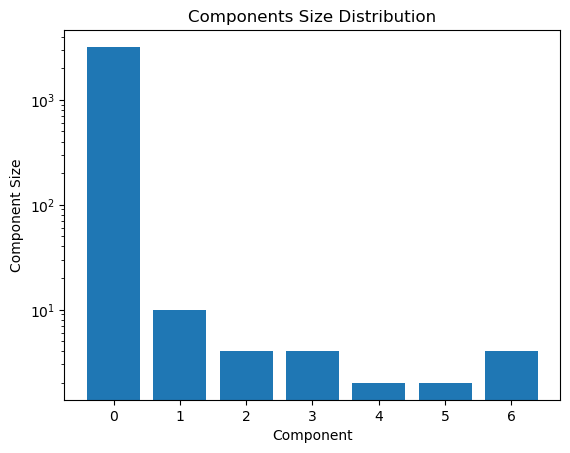

In [17]:
# Plotting the component size distribution
plt.bar(range(len(cluster_sizes)), cluster_sizes)
plt.xlabel('Component')
plt.ylabel('Component Size')
plt.title('Components Size Distribution')

ax = plt.gca()       # get current axes
ax.set_yscale('log') # set logarithmic scale

plt.show()

## 6. Degree Distribution

### 6.1 Maximum node degrees

In [18]:
AN_degrees = AN.degree()

max_degree = max(AN_degrees)

print(f'The maximum node degree is: {max_degree}')

The maximum node degree is: 1826


### 6.2 Average node degrees

In [19]:
avg_degree = sum(AN_degrees) / len(AN_degrees)

print(f'The average node degree is: {avg_degree:.4f}')

The average node degree is: 41.5501


### 6.3 Plotting the degree distribution

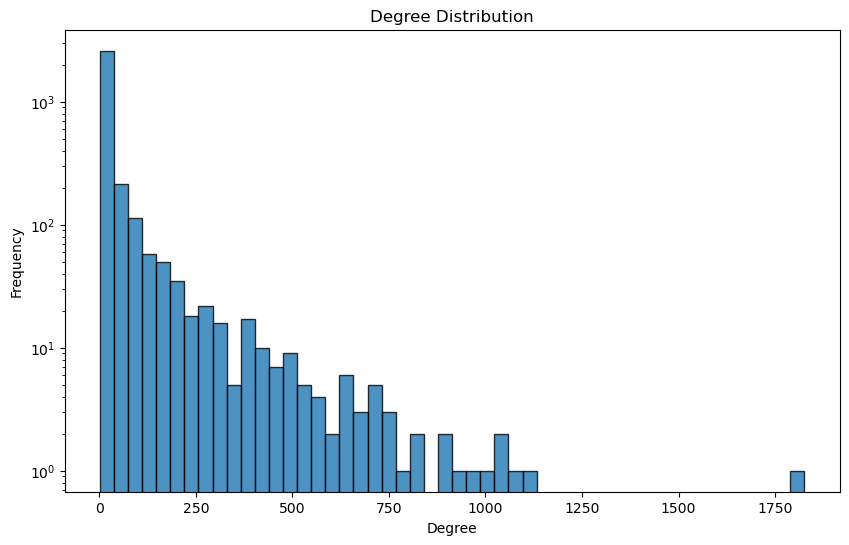

In [20]:
# Create a histogram of the degree distribution
# Plot the degree distribution
plt.figure(figsize=(10,6))
plt.hist(AN_degrees, bins=50, edgecolor='black', alpha=0.8)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')

ax = plt.gca()       # get current axes
ax.set_yscale('log') # set logarithmic scale

plt.show()

## 7. Centrality measures

In [21]:
def calculate_top_nodes(measures, threshold):
    
    top_nodes_ids = list()
    max_score = max(measures)
    
    for i, score in enumerate(measures):
        if score >= threshold * max_score:
            top_nodes_ids.append(i)
            
    return top_nodes_ids

### 7.1 Betnweenness
Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph.

In [22]:
betweenness_cen = AN.betweenness()

threshold = 0.6

In [23]:
top_betw_nodes = calculate_top_nodes(betweenness_cen, threshold)

In [24]:
for i in top_betw_nodes:
    print(f'Node ID: {i}, Betweenness Centrality: {betweenness_cen[i]:.4f}')

Node ID: 59, Betweenness Centrality: 374786.3832
Node ID: 62, Betweenness Centrality: 265953.2673
Node ID: 67, Betweenness Centrality: 305732.0469
Node ID: 132, Betweenness Centrality: 434598.3268
Node ID: 135, Betweenness Centrality: 289029.2244
Node ID: 293, Betweenness Centrality: 287593.4618
Node ID: 371, Betweenness Centrality: 268286.0138
Node ID: 2598, Betweenness Centrality: 301211.4358


### 7.2 PageRank
PageRank is a measure of the importance of nodes in a network, where nodes that are linked to by other important nodes have higher PageRank scores.

In [25]:
pagerank_scores = AN.pagerank()

threshold = 0.6

In [26]:
top_pagerank_nodes = calculate_top_nodes(pagerank_scores, threshold)

In [27]:
for i in top_pagerank_nodes:
    print(f'Node ID: {i}, PageRank score: {pagerank_scores[i]:.4f}')

Node ID: 135, PageRank score: 0.0062
Node ID: 251, PageRank score: 0.0098


### 7.3 Node degrees

In [28]:
threshold = 0.6

In [29]:
top_degrees = calculate_top_nodes(AN_degrees, threshold)

In [30]:
for i in top_degrees:
    print(f'Node ID: {i}, Degree score: {AN_degrees[i]:.4f}')

Node ID: 135, Degree score: 1108.0000
Node ID: 251, Degree score: 1826.0000


## 8. Transitivity

### 8.1 Global Transitivity (Clustering Coefficient)
The clustering coefficient of a network is the ratio of the number of triangles in the network to the number of possible triangles. It measures the global tendency of nodes to cluster together.

In [31]:
transitivity = AN.transitivity_undirected()

print(f'The global transitivity of the Airport Network is: {transitivity:.4f}')

The global transitivity of the Airport Network is: 0.2497


In [32]:
#AN.transitivity_local_undirected()

## 9. Assortativity

Degree assortativity measures the tendency of nodes in a network to be connected to other nodes with similar degrees.

In [35]:
assortativity = AN.assortativity_degree()

print(f'Assortativity Degee: {assortativity:.4f}')

Assortativity Degee: 0.0042


## 10. Community detection

In [50]:
# Detect communities using the Louvain method
communities = AN.community_multilevel()

In [51]:
communities

In [52]:
print(f'Number of communities found: {len(communities)}')

Number of communities found: 24


In [64]:
fig = plt.figure(figsize=(10,6))

# Get the community membership for each vertex
membership = communities.membership

# Generate a list of unique colors for each community
num_communities = max(membership) + 1
community_colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(num_communities)]

# Create a list of vertex colors based on community membership
vertex_colors = [community_colors[member] for member in membership]

# Plot the graph with communities in different colors
"""igraph.plot(AN, 
            vertex_color=vertex_colors,  # Specify the colors based on community membership
            vertex_size=10,             # Adjust the size of vertices as needed
            layout=AN.layout_kamada_kawai(),  # You can choose a layout algorithm (e.g., Fruchterman-Reingold)
            bbox=(800, 800),            # Adjust the plot size as needed
            margin=50) """

'igraph.plot(AN, \n            vertex_color=vertex_colors,  # Specify the colors based on community membership\n            vertex_size=10,             # Adjust the size of vertices as needed\n            layout=AN.layout_kamada_kawai(),  # You can choose a layout algorithm (e.g., Fruchterman-Reingold)\n            bbox=(800, 800),            # Adjust the plot size as needed\n            margin=50) '

<Figure size 1000x600 with 0 Axes>